## EDA esercizio
<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/EDA2.jpg" width=800 >


# TIPS

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


A data frame with 244 observations on the following 8 variables.


**total_bill:** a numeric vector, the bill amount (dollars)

**tip:**a numeric vector, the tip amount (dollars)

**sex:** factor with levels Female Male, gender of the payer of the bill

**smoker:** factor with levels No Yes, whether the party included smokers

**day:** factor with levels Friday Saturday Sunday Thursday, day of the week

**time:** factor with levels Day Night, rough time of day

**size:** numeric vector, number of people in party

In [5]:
# sns.set()
# tips = sns.load_dataset("tips")
# tips.head()

In [6]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
tips['smoker'].value_counts(normalize=False)

No     151
Yes     93
Name: smoker, dtype: int64

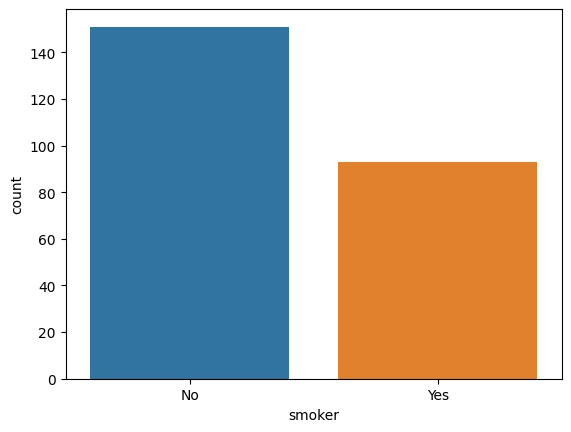

In [10]:
sns.countplot(x='smoker',data=tips,hue='smoker');

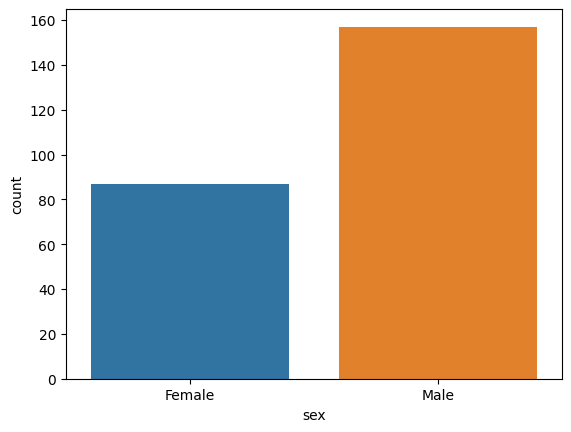

In [11]:
sns.countplot(x='sex',data=tips,hue='sex');

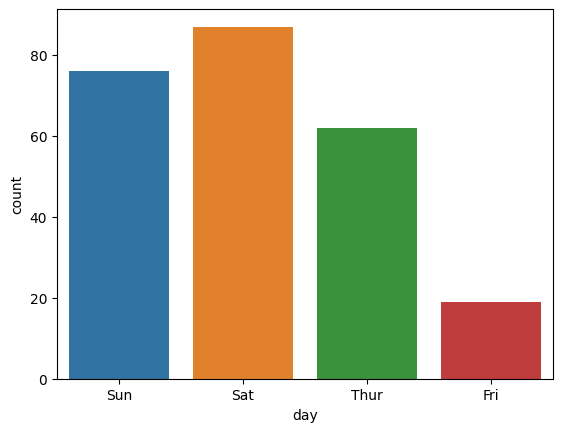

In [12]:
sns.countplot(x='day',data=tips,hue='day');

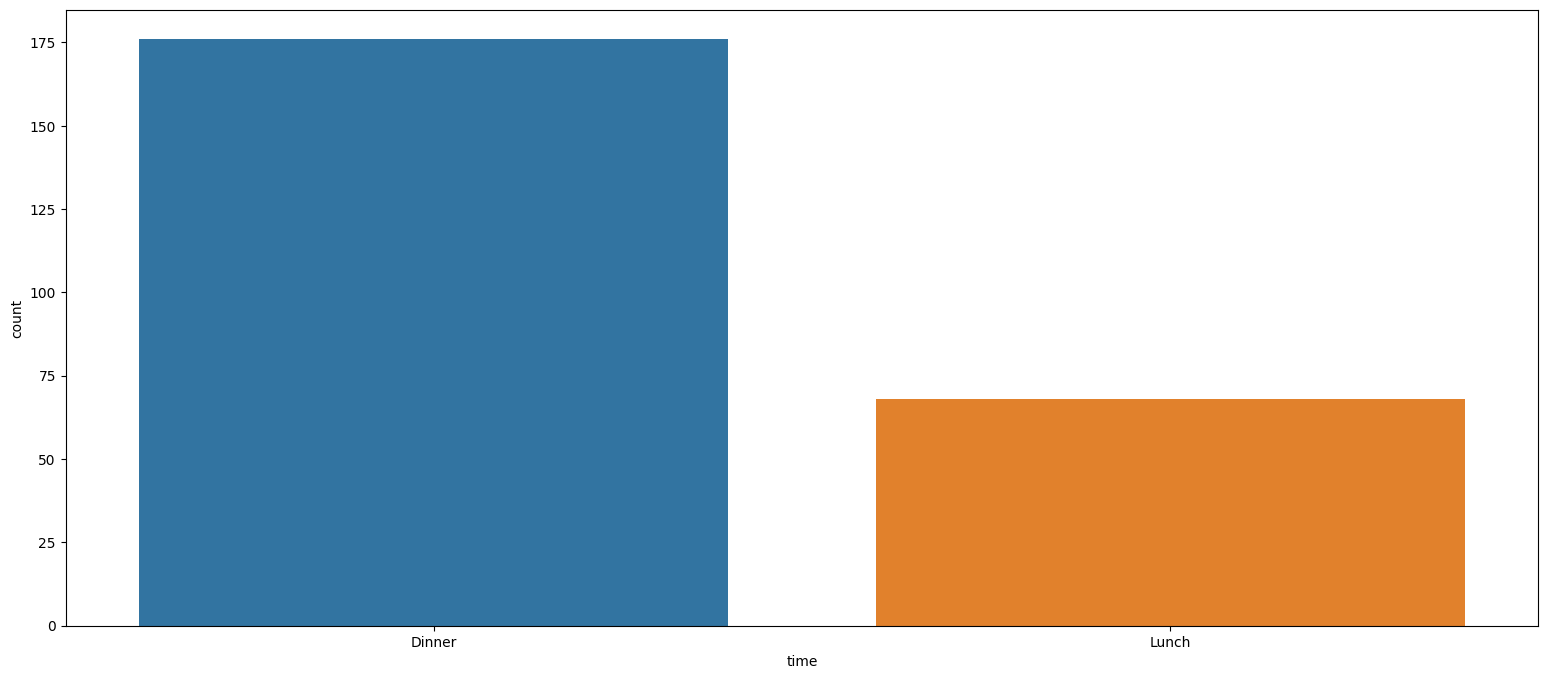

In [13]:
plt.figure(figsize=(19,8))
sns.countplot(x='time',data=tips,hue='time');

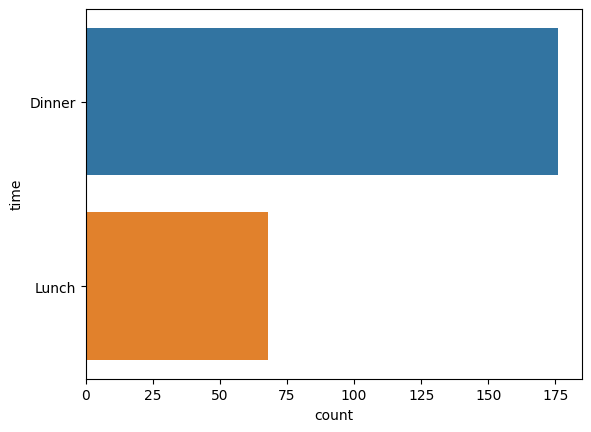

In [14]:
sns.countplot(y='time',data=tips,hue='time');

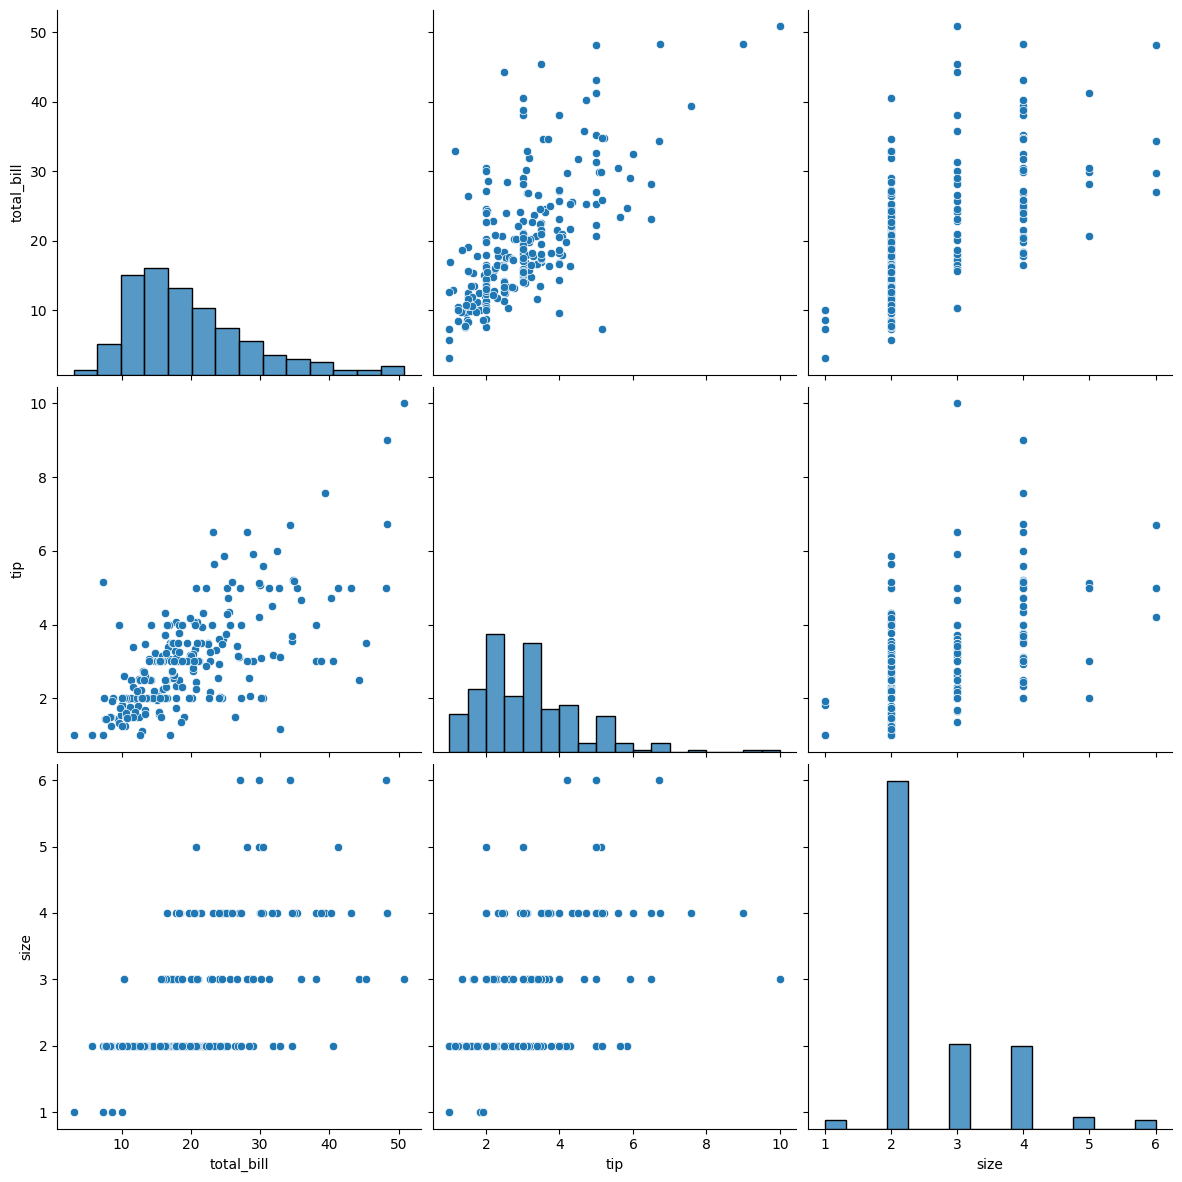

In [15]:
sns.pairplot(tips,height=4,corner=False)

In [16]:
## Categorical = 'sex', 'smoker' , 'day', 'time' , 'size'

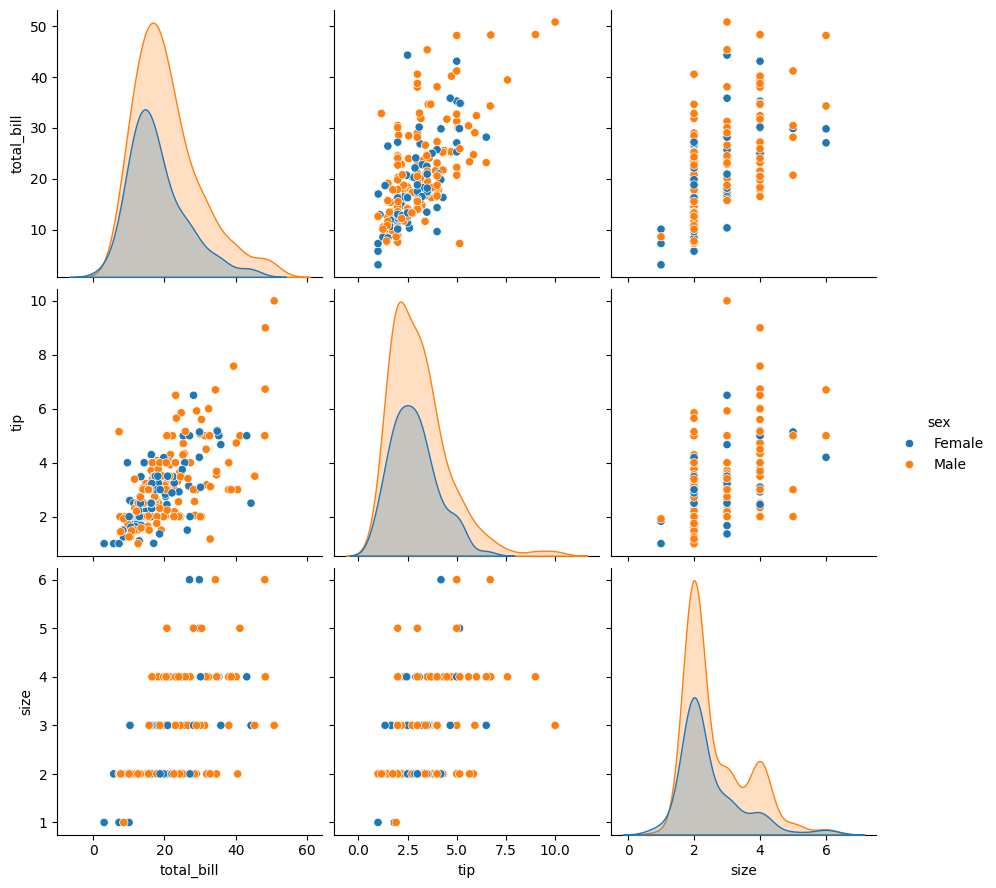

In [17]:
sns.pairplot(tips,height=3,hue='sex');

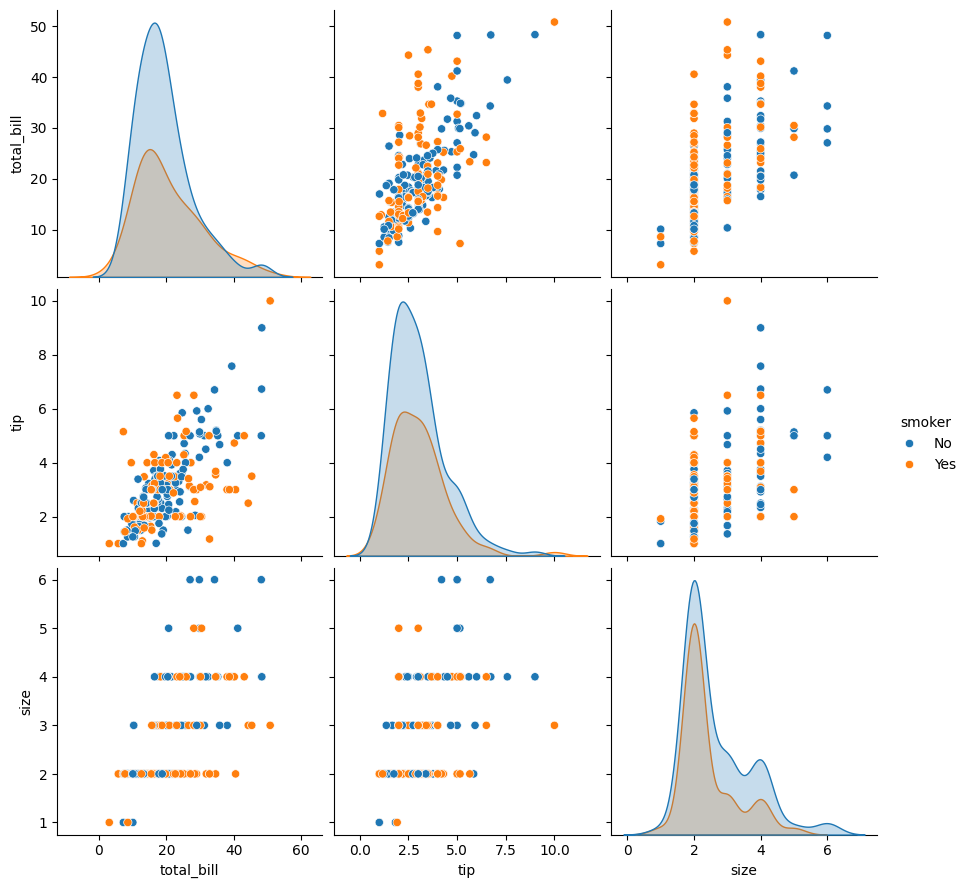

In [18]:
sns.pairplot(tips,height=3,hue='smoker');

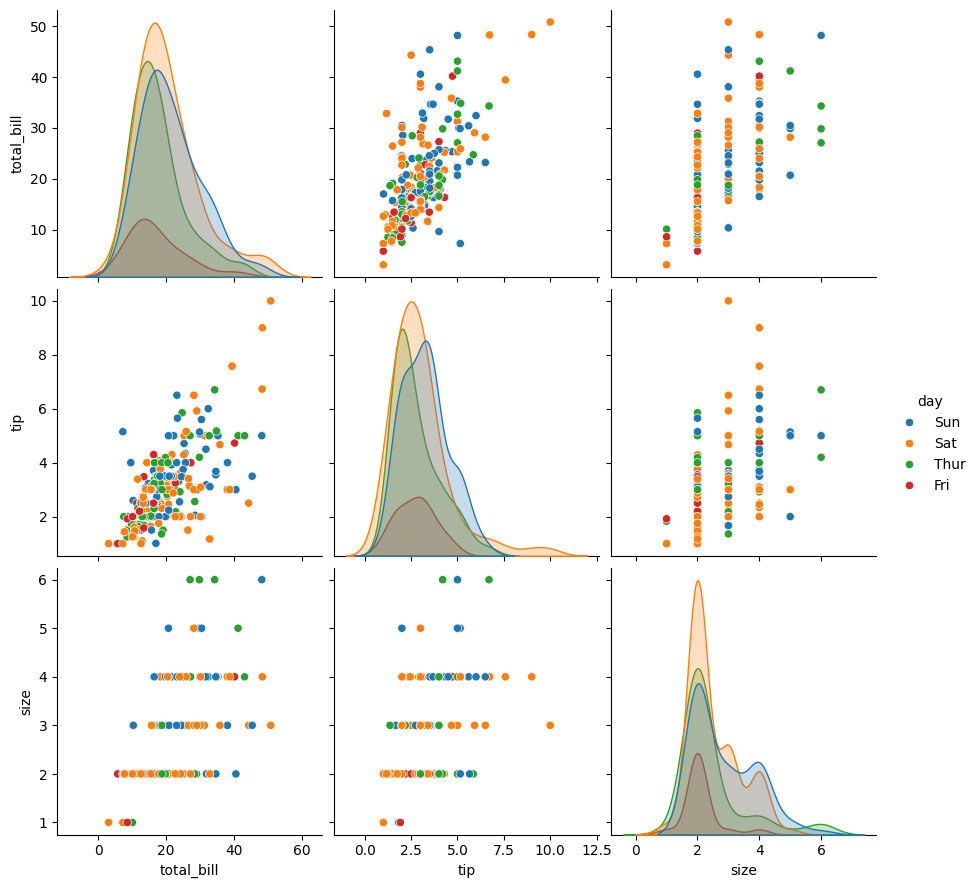

In [19]:
sns.pairplot(tips,height=3,hue='day');

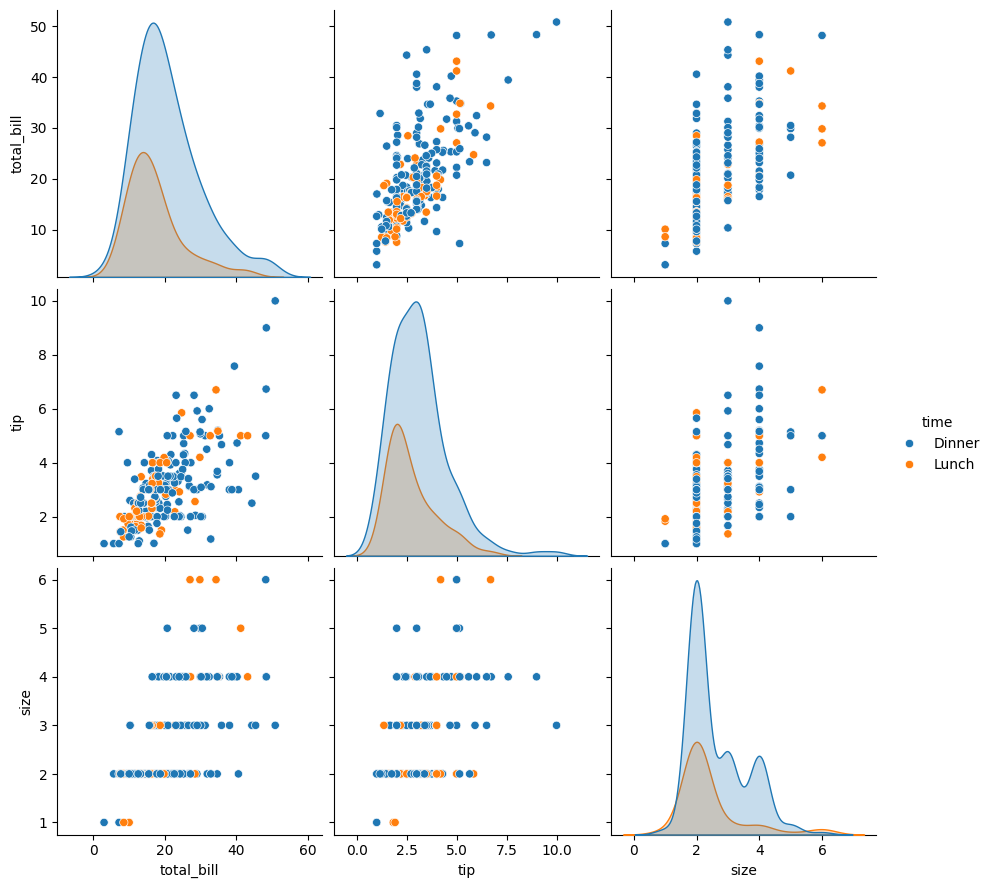

In [20]:
sns.pairplot(tips,height=3,hue='time');

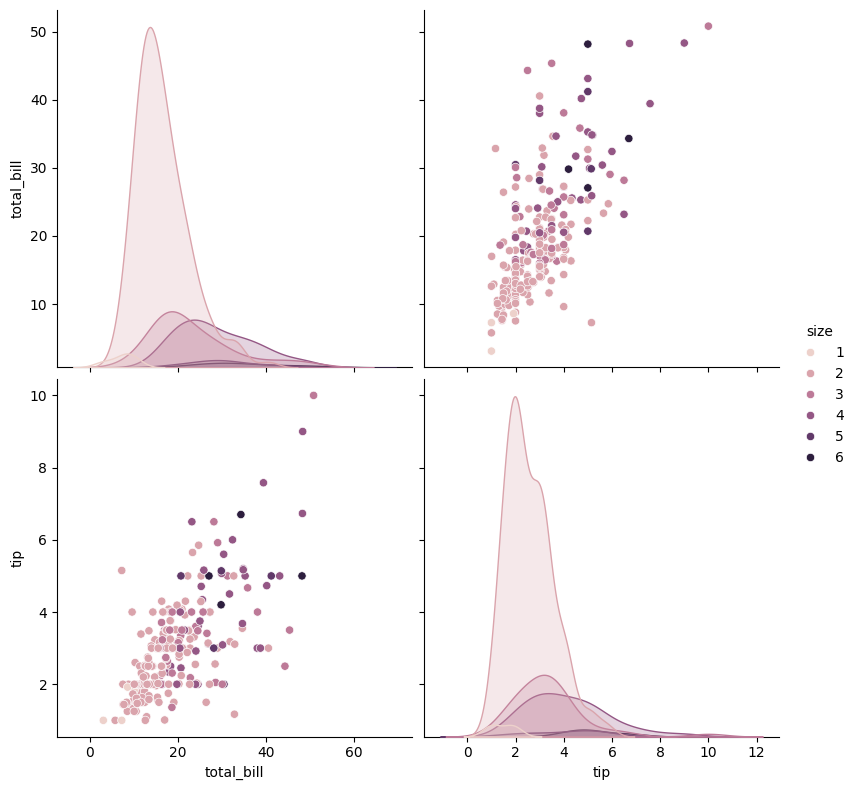

In [21]:
sns.pairplot(tips,height=4,hue='size');

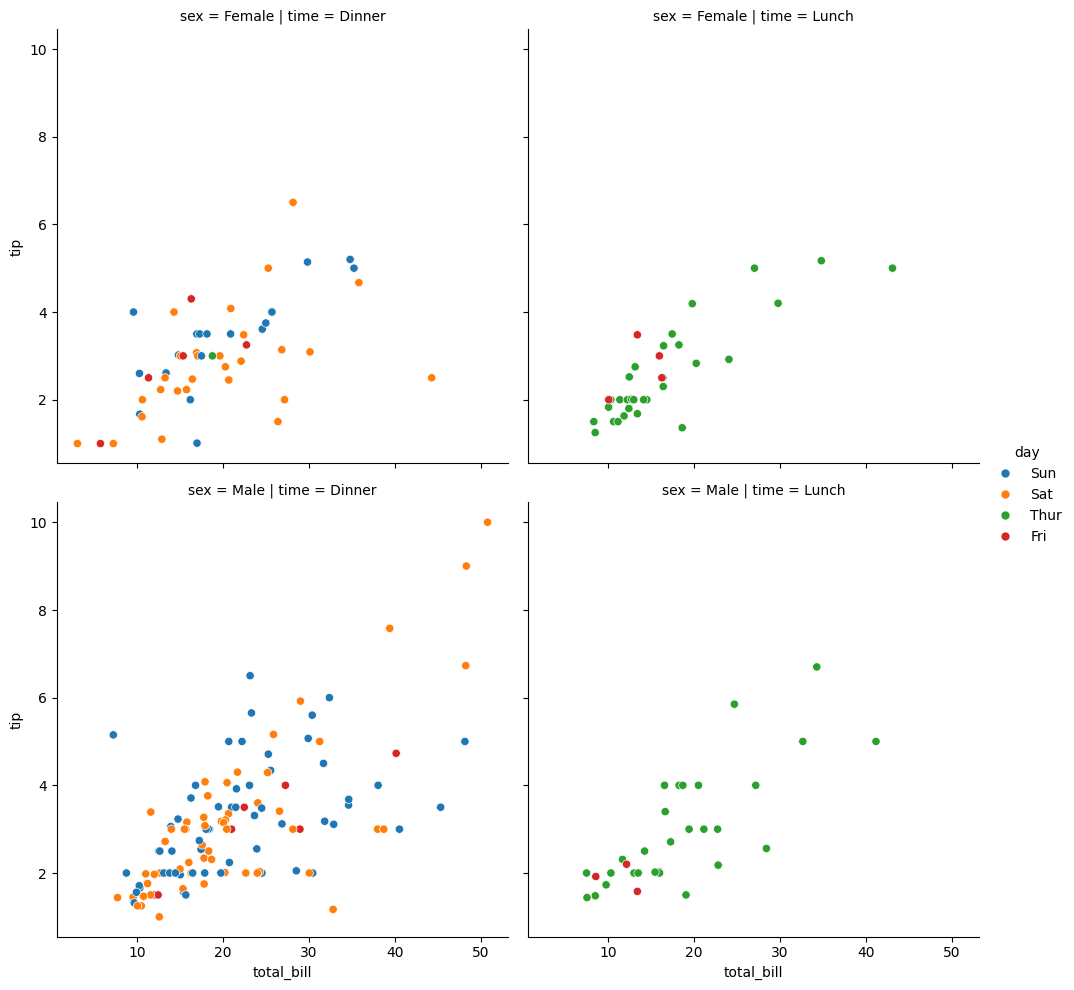

In [22]:

sns.relplot(x="total_bill", y="tip", hue="day",
                col="time", row="sex", data=tips);

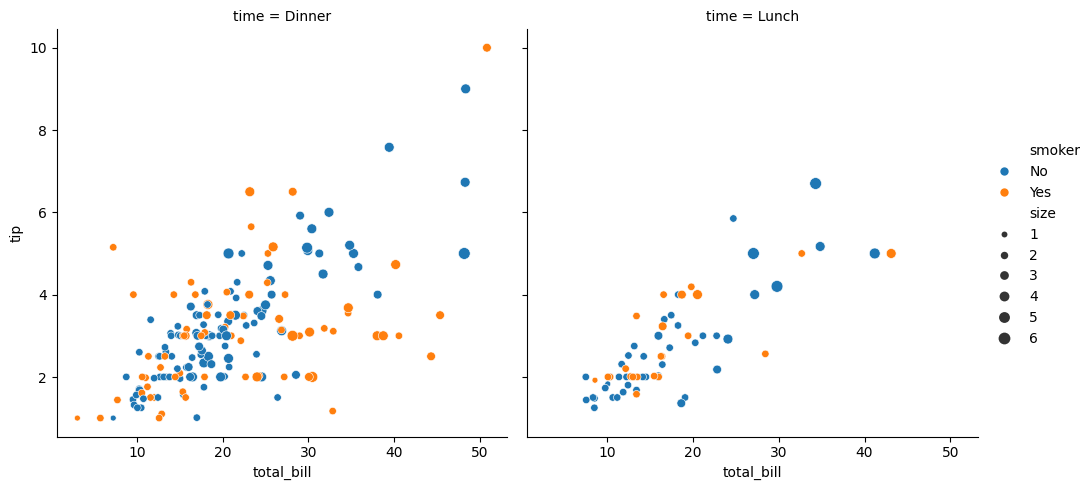

In [23]:
sns.relplot(x="total_bill", y="tip", col="time",hue="smoker", size="size",
            data=tips);

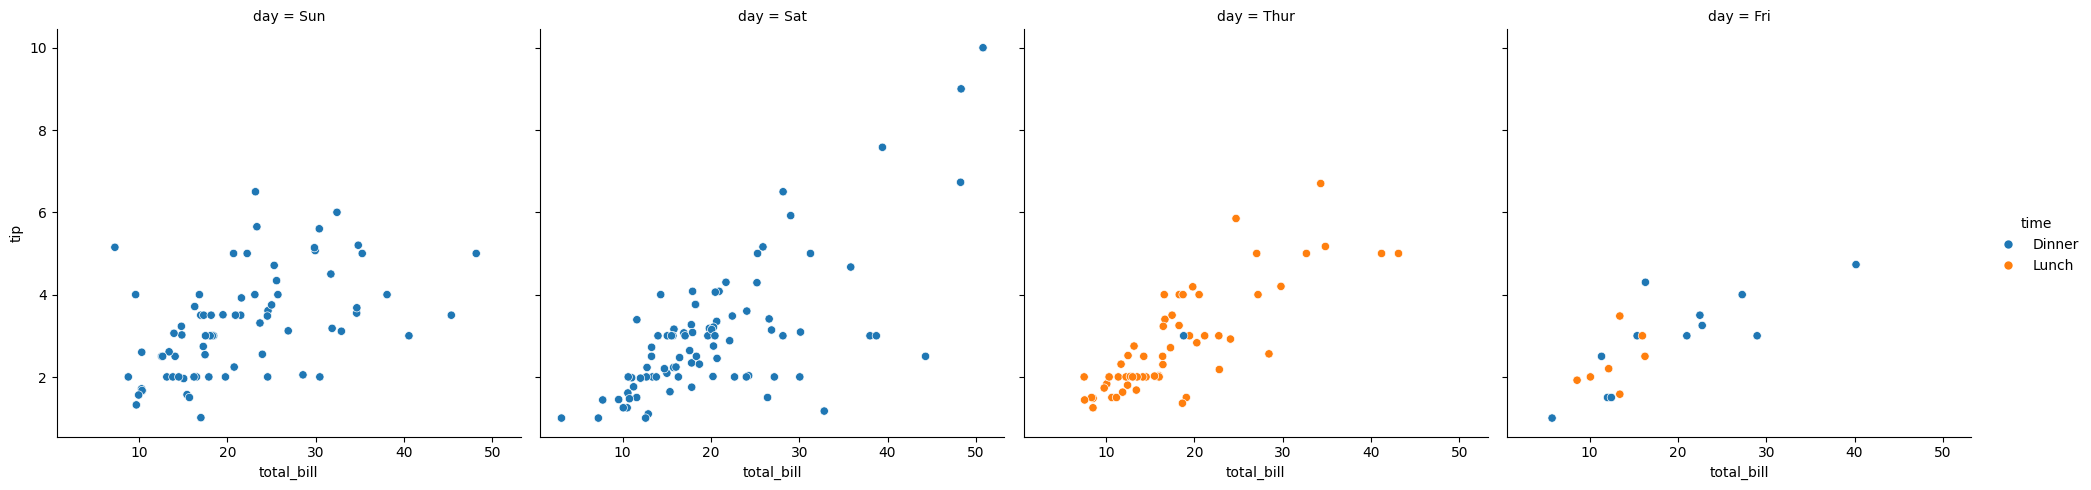

In [24]:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", data=tips)

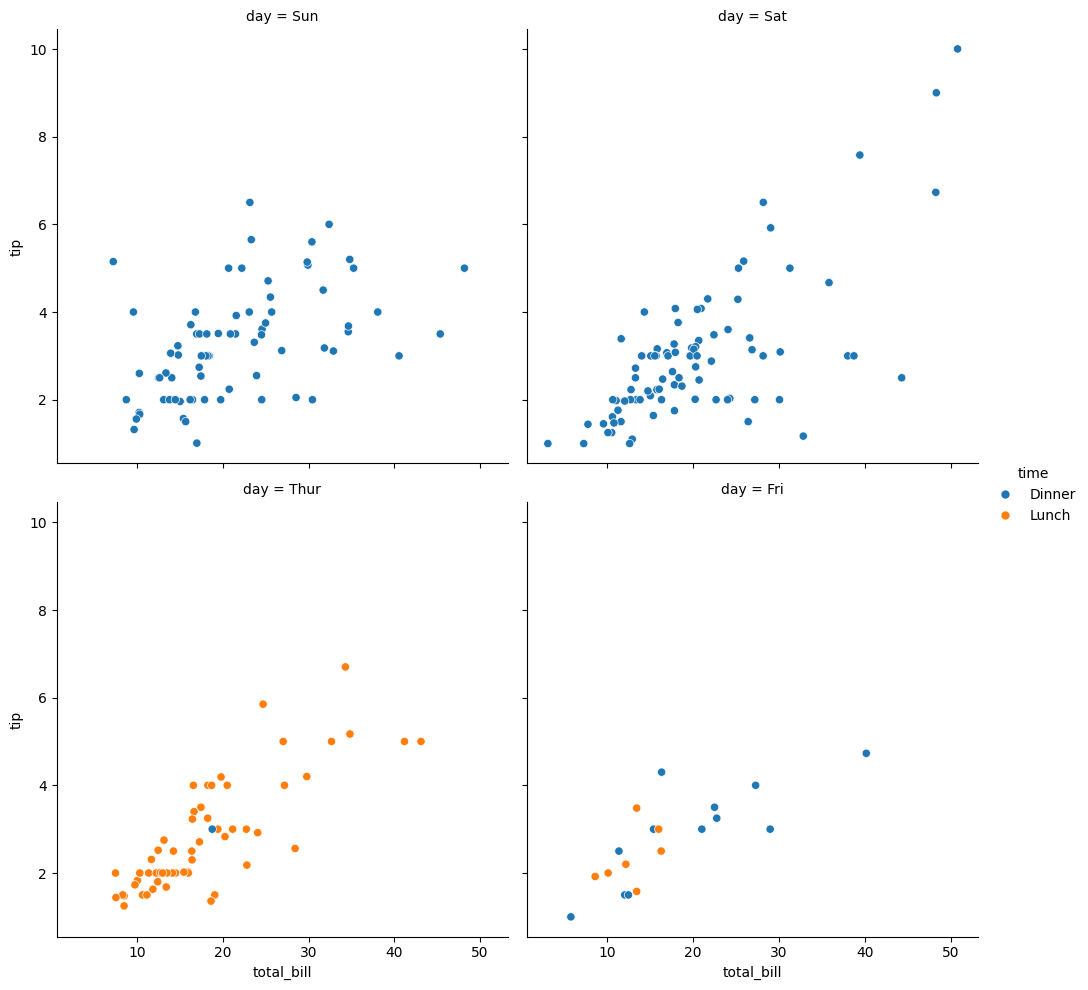

In [25]:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", col_wrap=2, data=tips)

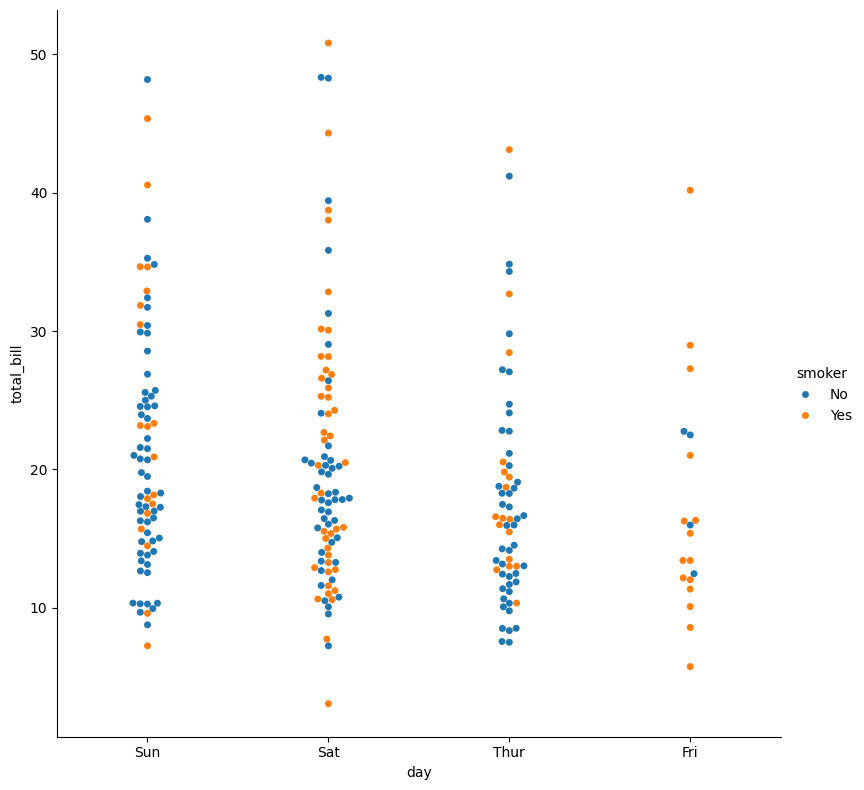

In [26]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips,
            height=8, aspect=1);

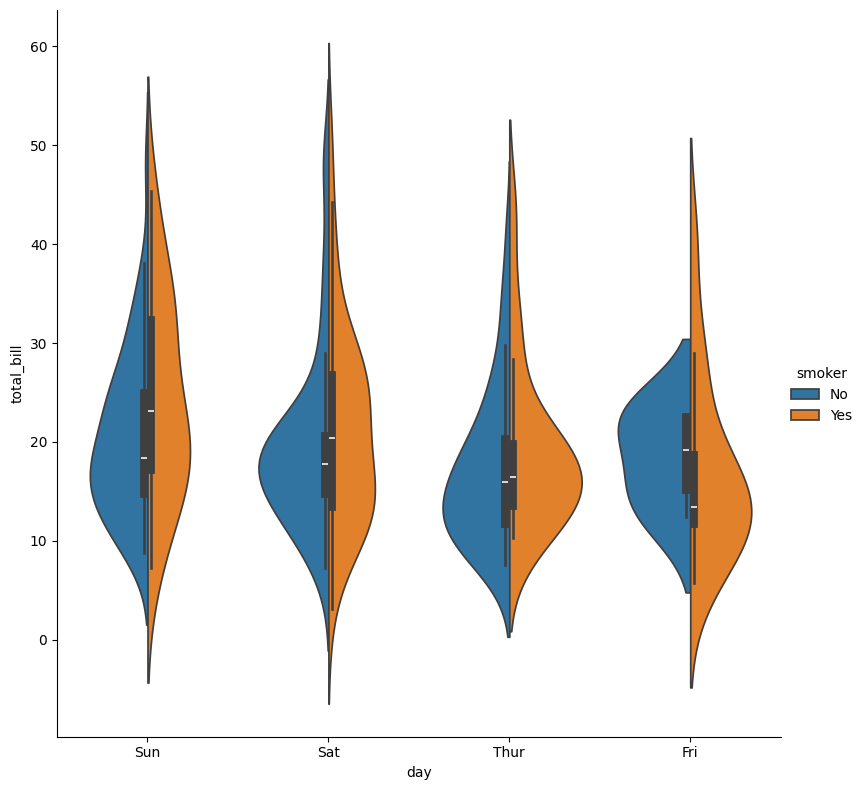

In [27]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips,
            height=8,aspect=1);

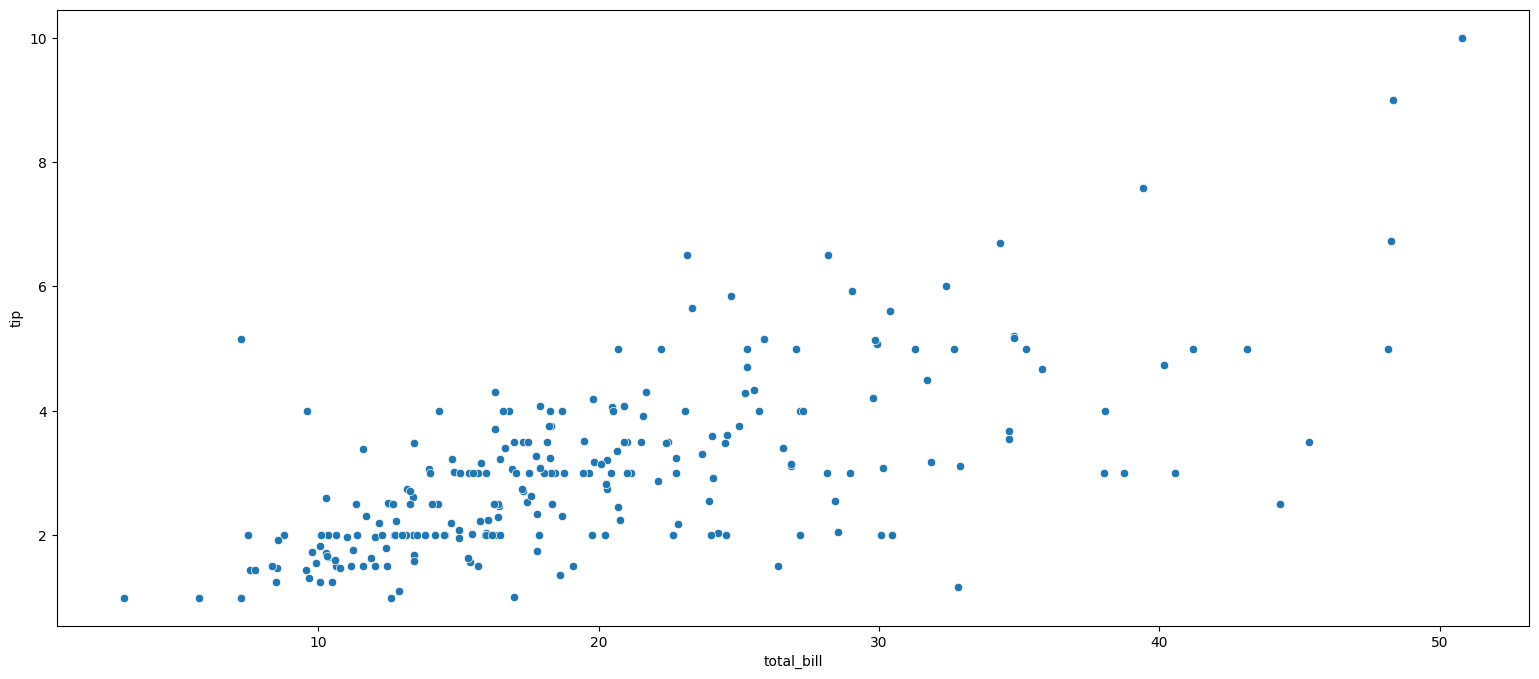

In [28]:
plt.figure(figsize=(19,8))
sns.scatterplot(x="total_bill", y="tip", data=tips);

C:\Users\lucam\AppData\Local\Temp\ipykernel_24420\2078900410.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip']);


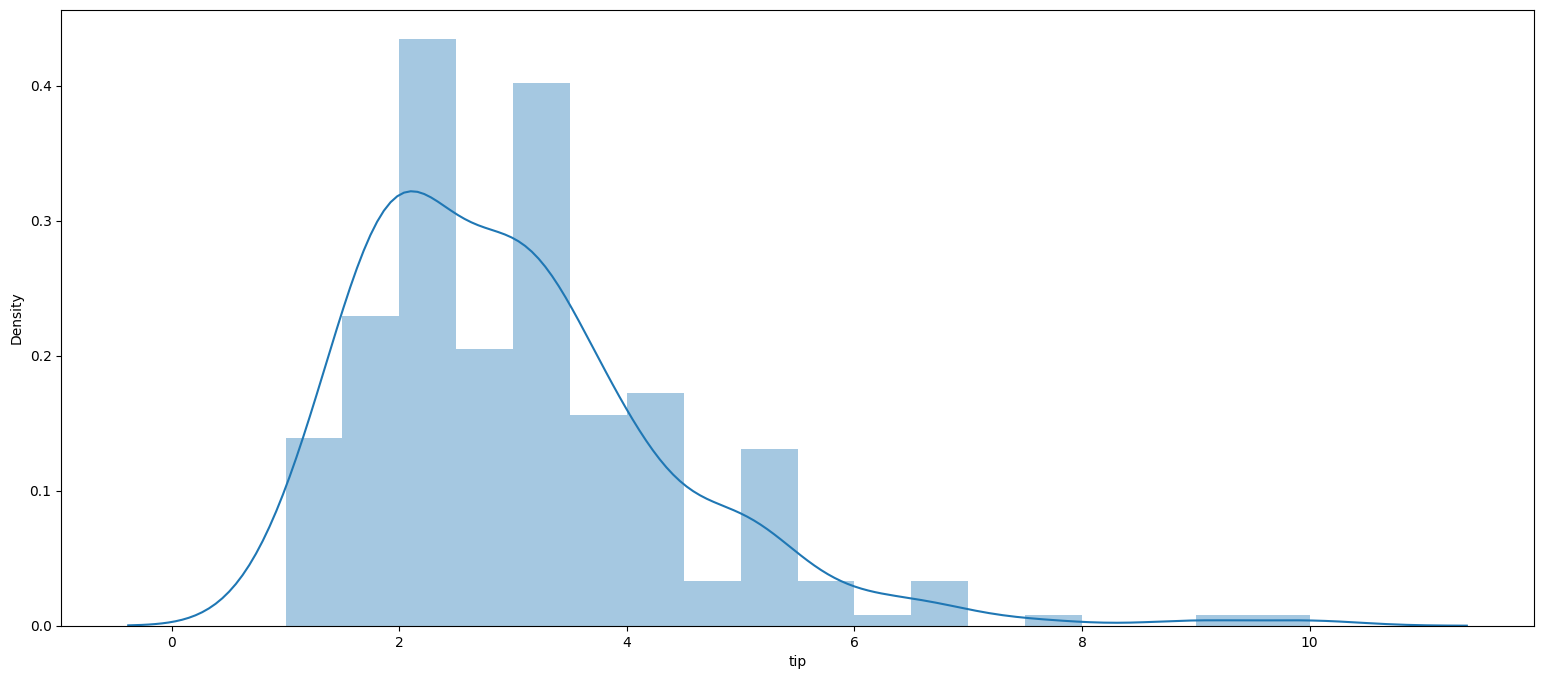

In [29]:
plt.figure(figsize=(19,8))
sns.distplot(tips['tip']);

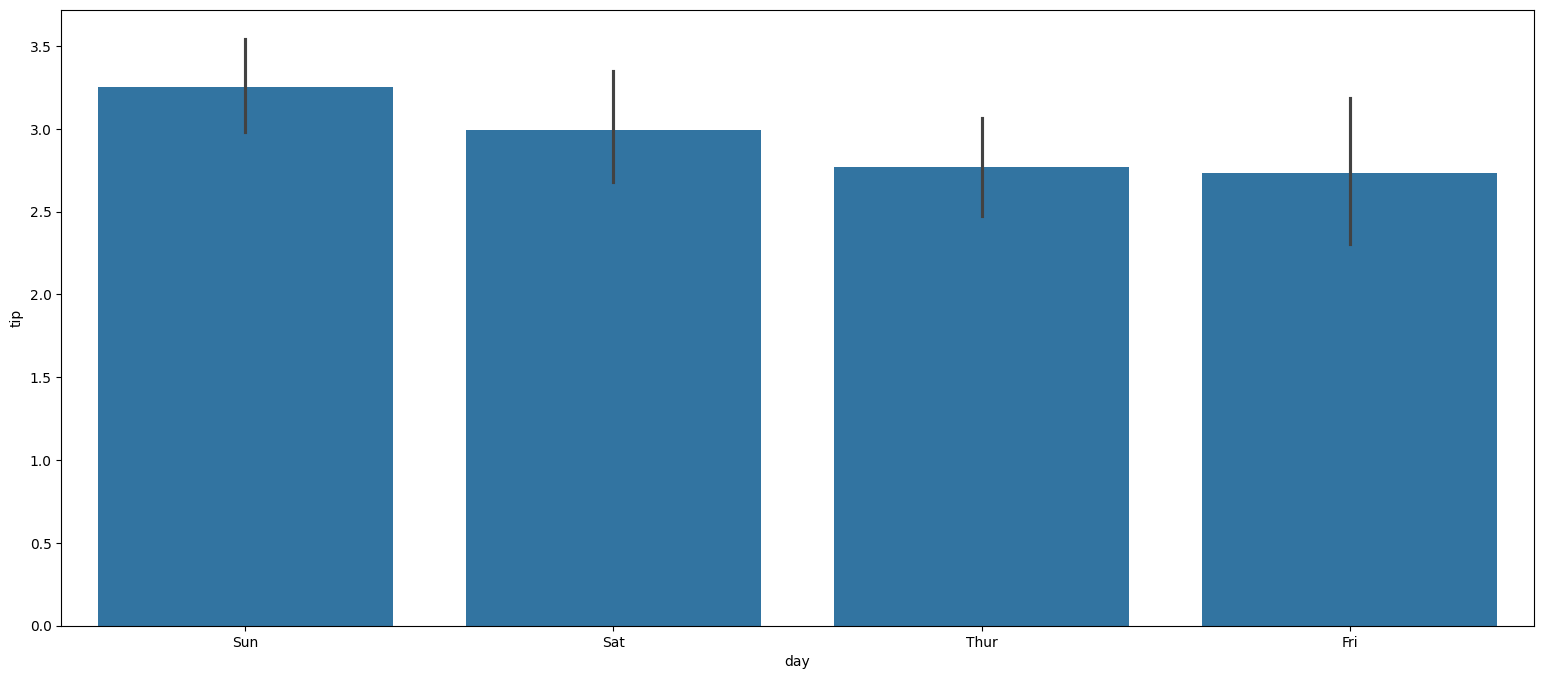

In [30]:
plt.figure(figsize=(19,8))
sns.barplot(x="day", y="tip", data = tips);

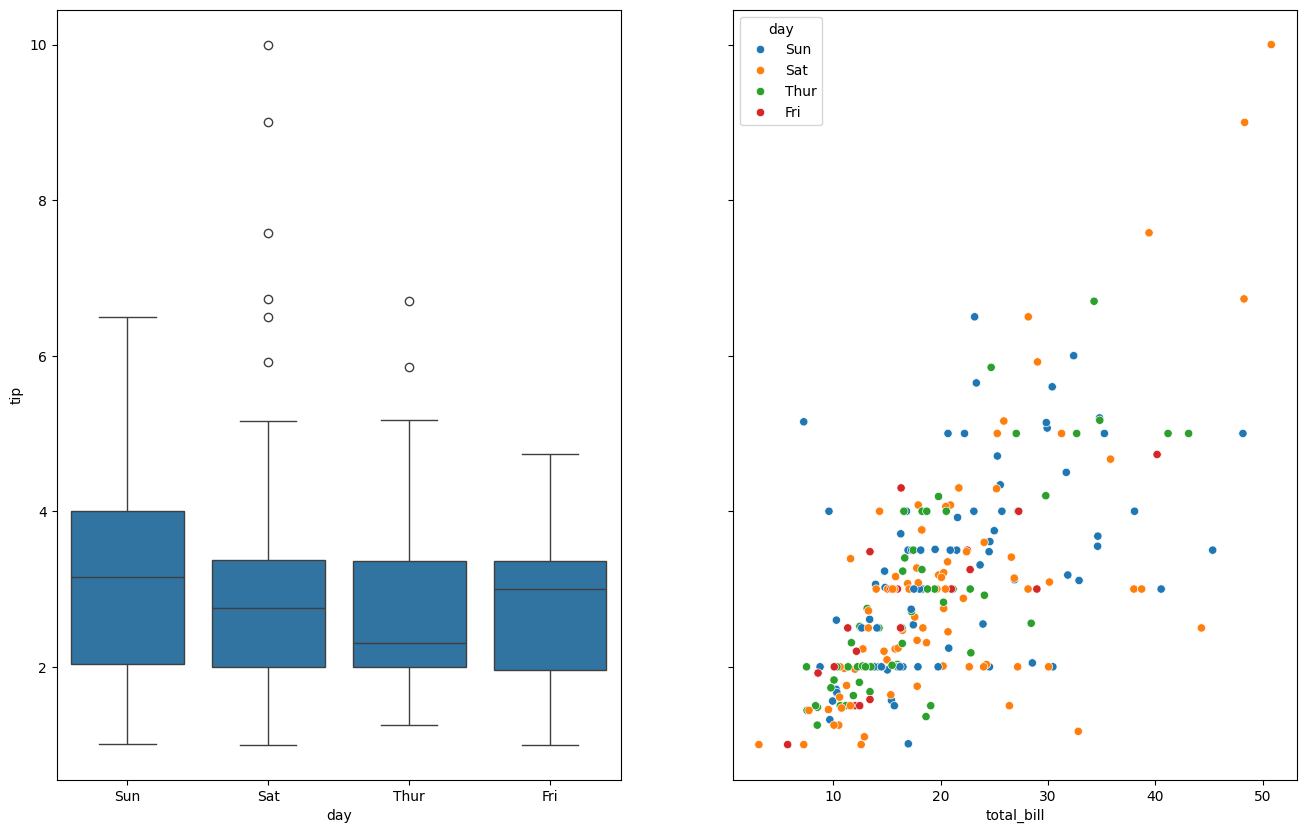

In [31]:
fig,ax =plt.subplots(1, 2, sharey=True, figsize=(16, 10))

sns.boxplot(x="day", y="tip", data=tips, ax=ax[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=ax[1]);

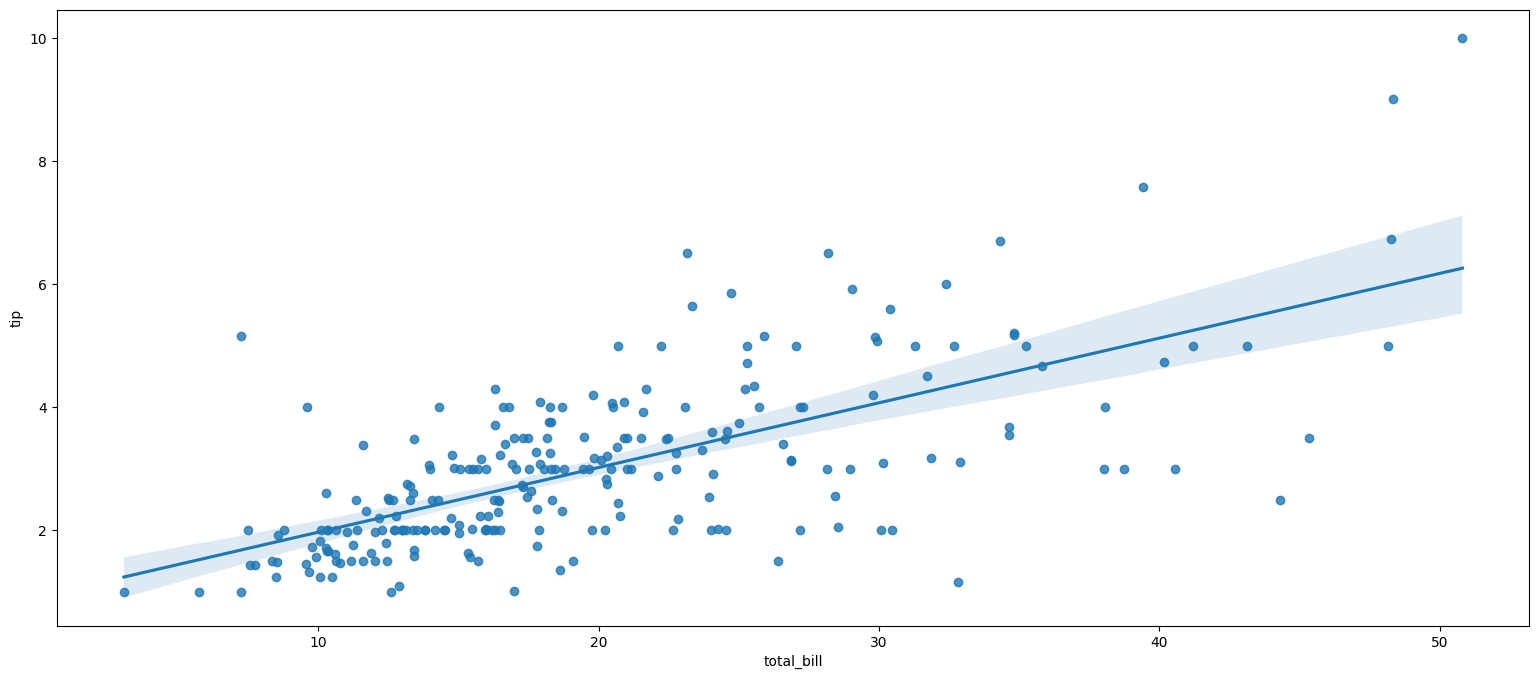

In [32]:
plt.figure(figsize=(19,8))
sns.regplot(x="total_bill", y="tip", data=tips);

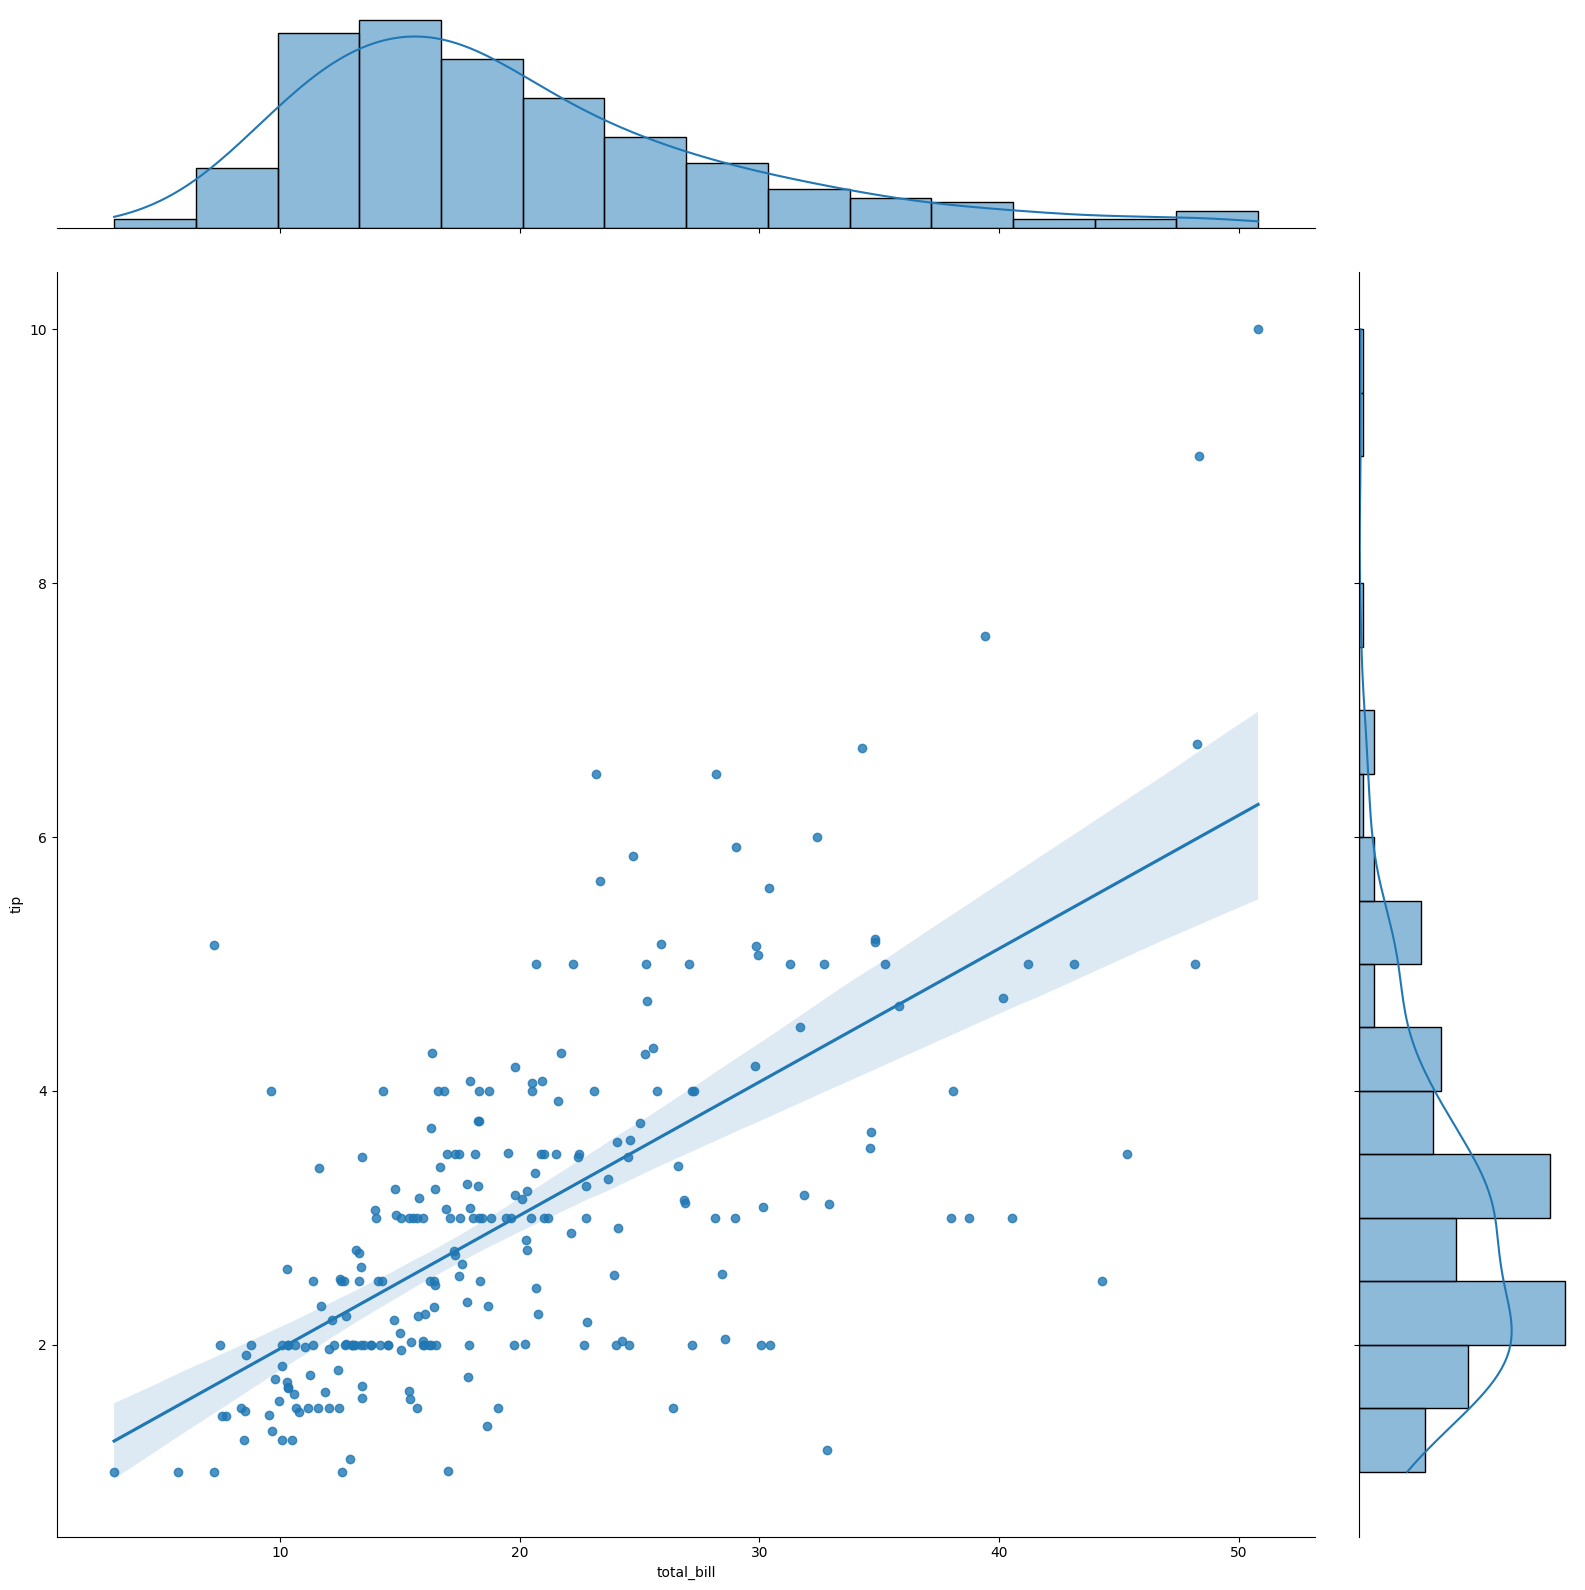

In [33]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg',height=16)


In [34]:
corr = tips.corr(numeric_only=True)
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


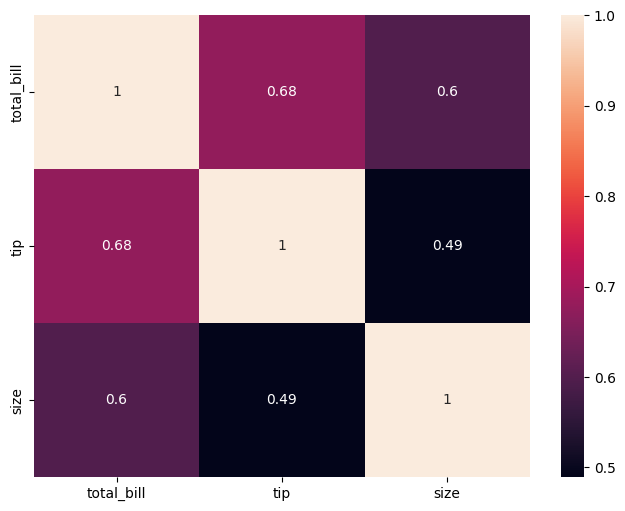

In [35]:
plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot = True);

c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


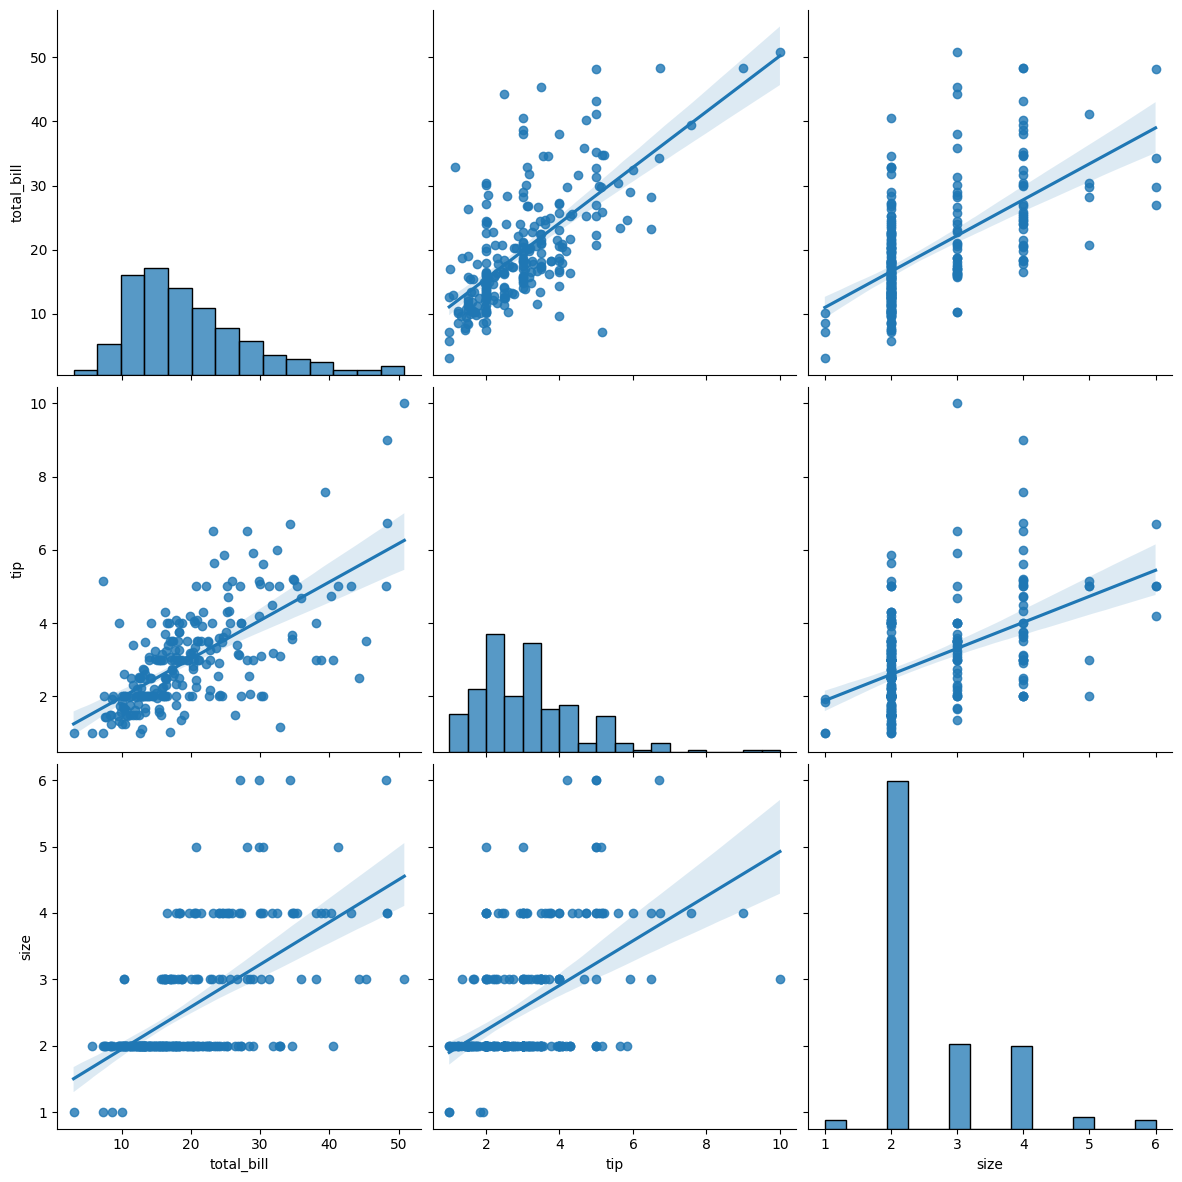

In [36]:
sns.pairplot(data=tips,kind="reg", size=4);

c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


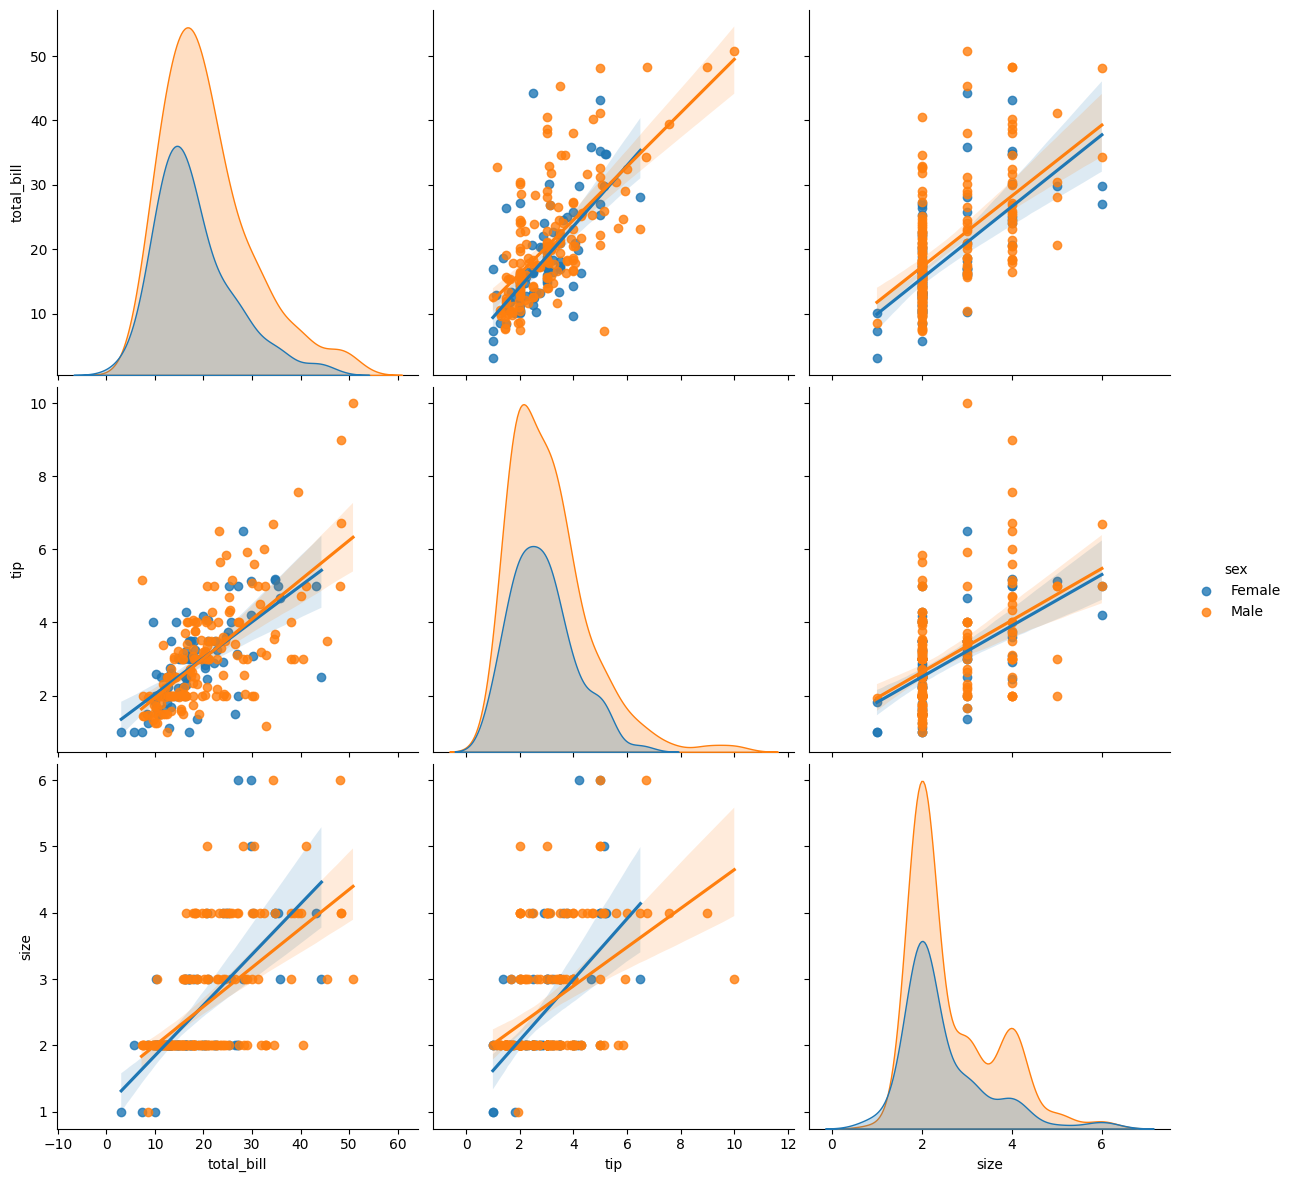

In [37]:
sns.pairplot(data=tips,kind="reg", size=4, hue="sex");

c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


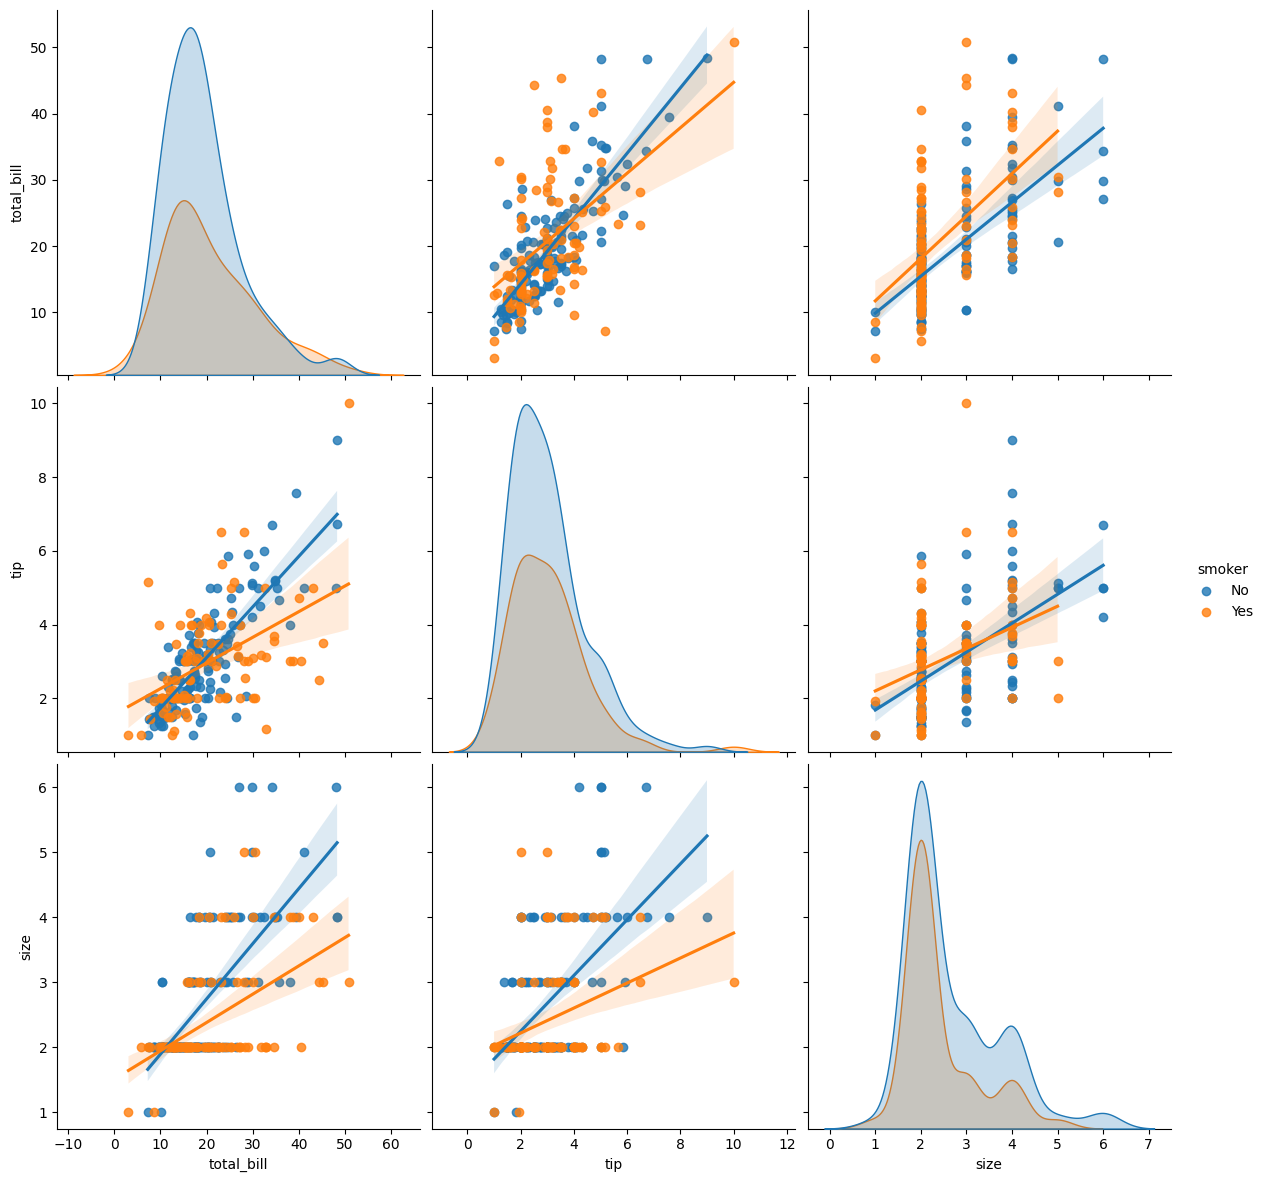

In [38]:
sns.pairplot(data=tips,kind="reg", size=4, hue="smoker")

---

In [39]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
X = tips[["total_bill","size"]]
y = tips["tip"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
df_predizioni = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})

In [46]:
df_predizioni

,y_test,y_pred
24,3.18,2.897952
6,2.00,1.848708
153,2.00,3.830761
211,5.16,3.957999
198,2.00,2.250364
...,...,...
172,5.15,1.704377
242,1.75,2.708044
152,2.74,2.896707
231,3.00,2.747629


<Axes: xlabel='y test', ylabel='y predette'>

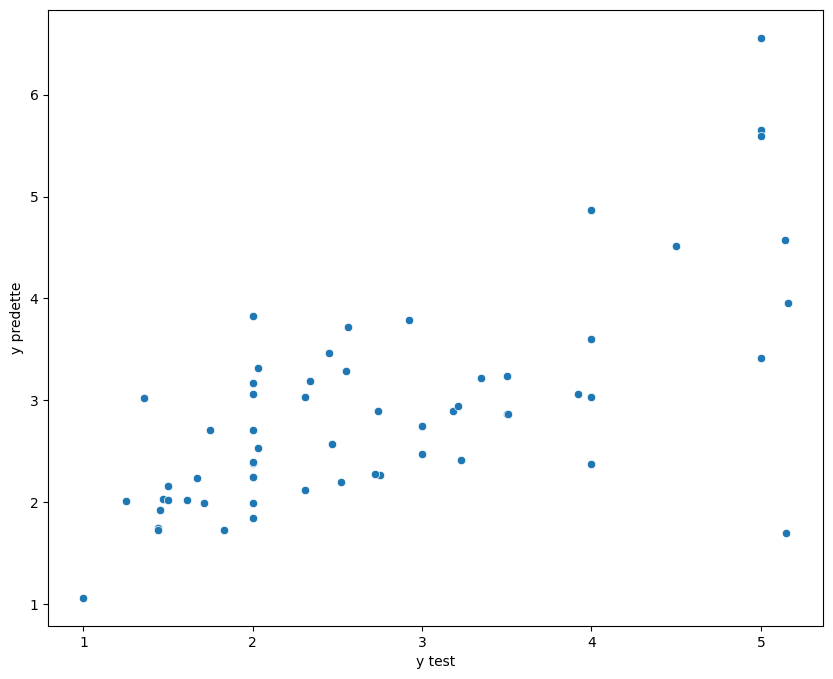

In [47]:
plt.figure(figsize=(10,8))
plt.xlabel("y test")
plt.ylabel("y predette")
sns.scatterplot(x=y_test, y=y_pred, data=df_predizioni)

In [48]:
model.coef_

array([0.09495423, 0.24183759])

In [49]:
print("Coefficiente di regressione (pesi):", model.coef_)
print("Intercetta:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Coefficiente di regressione (pesi): [0.09495423 0.24183759]
Intercetta: 0.5322839628718325
Mean Squared Error (MSE): 0.7743095126500432
R2 score: 0.4179983009893019


In [50]:
y_pred

array([2.89795206, 1.84870778, 3.83076077, 3.95799945, 2.25036419,
       2.71469039, 3.71645756, 2.20098799, 2.41938272, 2.47635526,
       2.75267209, 2.03861625, 2.02722174, 2.39089645, 1.73031069,
       3.02774366, 3.03439046, 3.06507152, 2.5779563 , 5.65263682,
       3.46423743, 3.21860167, 2.37475423, 1.92277208, 3.24234023,
       2.12597414, 1.99113913, 3.41640218, 3.06542965, 6.55725496,
       4.87270443, 1.75090492, 3.19076924, 2.94258055, 2.86917009,
       3.78613228, 2.15825858, 5.59311136, 2.26555687, 3.16857163,
       2.01392815, 2.39469462, 3.29011305, 2.23867397, 1.99778593,
       1.06563105, 2.02152448, 3.03249137, 1.73381315, 2.27695137,
       3.32049841, 3.60631065, 4.51063309, 2.53332781, 2.86661717,
       2.25321281, 1.70437734, 2.7080436 , 2.89670682, 2.74762867,
       4.57585581])

In [51]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [52]:
tips["predizioni"] = 0.5322839628718325 + (tips["total_bill"] * 0.09495423) + (tips["size"] * 0.24183759)

In [53]:
tips

,total_bill,tip,sex,smoker,day,time,size,predizioni
0,16.99,1.01,Female,No,Sun,Dinner,2,2.629232
1,10.34,1.66,Male,No,Sun,Dinner,3,2.239623
2,21.01,3.50,Male,No,Sun,Dinner,3,3.252785
3,23.68,3.31,Male,No,Sun,Dinner,2,3.264475
4,24.59,3.61,Female,No,Sun,Dinner,4,3.834559
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,4.014318
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.596815
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.168572
242,17.82,1.75,Male,No,Sat,Dinner,2,2.708044


In [54]:
import plotly.graph_objects as go
import numpy as np

In [55]:
y_test

24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
       ... 
172    5.15
242    1.75
152    2.74
231    3.00
155    5.14
Name: tip, Length: 61, dtype: float64

In [56]:
lenght = y_pred.shape[0]
x = np.linspace(0,lenght,lenght)

In [57]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y_test, name="real", mode="lines"))
fig.add_trace(go.Scatter(x=x, y=y_pred, name="predicted", mode="lines"))
fig.update_layout(title="Error from prediction on Test Set", xaxis_title="Obeservation", yaxis_title="Value",width=900)
fig.show()

---

In [58]:
tips

,total_bill,tip,sex,smoker,day,time,size,predizioni
0,16.99,1.01,Female,No,Sun,Dinner,2,2.629232
1,10.34,1.66,Male,No,Sun,Dinner,3,2.239623
2,21.01,3.50,Male,No,Sun,Dinner,3,3.252785
3,23.68,3.31,Male,No,Sun,Dinner,2,3.264475
4,24.59,3.61,Female,No,Sun,Dinner,4,3.834559
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,4.014318
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.596815
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.168572
242,17.82,1.75,Male,No,Sat,Dinner,2,2.708044


In [59]:
tip2 = tips.copy()
tip2["sex"] = tip2["sex"].replace(["Female","Male"],[0,1])
tip2["smoker"] = tip2["smoker"].replace(["No","Yes"],[0,1])
tip2["time"] = tip2["time"].replace(["Lunch","Dinner"],[0,1])

In [60]:
tip2

,total_bill,tip,sex,smoker,day,time,size,predizioni
0,16.99,1.01,0,0,Sun,1,2,2.629232
1,10.34,1.66,1,0,Sun,1,3,2.239623
2,21.01,3.50,1,0,Sun,1,3,3.252785
3,23.68,3.31,1,0,Sun,1,2,3.264475
4,24.59,3.61,0,0,Sun,1,4,3.834559
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,1,3,4.014318
240,27.18,2.00,0,1,Sat,1,2,3.596815
241,22.67,2.00,1,1,Sat,1,2,3.168572
242,17.82,1.75,1,0,Sat,1,2,2.708044


In [61]:
X = tip2[["total_bill","size","sex","smoker"]]
y = tip2["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficiente di regressione (pesi):", model.coef_)
print("Intercetta:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Coefficiente di regressione (pesi): [ 0.09857587  0.20779515  0.01055224 -0.260258  ]
Intercetta: 0.6407738286672
Mean Squared Error (MSE): 0.8442288576739012
R2 score: 0.36544415186316015


In [62]:
#   Coefficiente di regressione (pesi): [0.09495423 0.24183759]m
#   Intercetta: 0.5322839628718325
#   Mean Squared Error (MSE): 0.7743095126500432
#   R2 score: 0.4179983009893019

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y_test, name="real", mode="lines"))
fig.add_trace(go.Scatter(x=x, y=y_pred, name="predicted", mode="lines"))
fig.update_layout(title="Error from prediction on Test Set", xaxis_title="Obeservation", yaxis_title="Value",width=900)
fig.show()

In [64]:
X.columns[0]

'total_bill'

In [68]:
y_pred

array([3.02069011, 1.93142675, 3.90254427, 3.77437794, 2.07759244,
       2.57018068, 3.6101561 , 2.28659098, 2.52386772, 2.31220301,
       2.86986903, 2.12857849, 2.10619714, 2.23403696, 1.84122799,
       3.10161349, 2.85880804, 3.19418364, 2.67793719, 5.75064189,
       3.51148917, 3.31030323, 2.20672683, 2.00831593, 3.06413696,
       2.21926829, 2.07929055, 3.28810412, 3.10802276, 6.64649661,
       5.02749488, 1.5696356 , 3.23814291, 2.80676277, 2.93699179,
       3.84566137, 1.99252608, 5.46130217, 2.35362257, 3.04137334,
       2.10294876, 2.48768576, 3.42780845, 2.28244801, 1.82593286,
       0.8909389 , 1.84002459, 3.11709452, 1.81214994, 2.37600392,
       3.19909473, 3.4958081 , 4.6083475 , 2.64215877, 2.98816007,
       2.35135995, 1.52133343, 2.82353837, 2.97613103, 2.56110892,
       4.62223929])

In [ ]:
df_predizioni = pd.DataFrame(y_pred, )

array([[3.02069011],
       [1.93142675],
       [3.90254427],
       [3.77437794],
       [2.07759244],
       [2.57018068],
       [3.6101561 ],
       [2.28659098],
       [2.52386772],
       [2.31220301],
       [2.86986903],
       [2.12857849],
       [2.10619714],
       [2.23403696],
       [1.84122799],
       [3.10161349],
       [2.85880804],
       [3.19418364],
       [2.67793719],
       [5.75064189],
       [3.51148917],
       [3.31030323],
       [2.20672683],
       [2.00831593],
       [3.06413696],
       [2.21926829],
       [2.07929055],
       [3.28810412],
       [3.10802276],
       [6.64649661],
       [5.02749488],
       [1.5696356 ],
       [3.23814291],
       [2.80676277],
       [2.93699179],
       [3.84566137],
       [1.99252608],
       [5.46130217],
       [2.35362257],
       [3.04137334],
       [2.10294876],
       [2.48768576],
       [3.42780845],
       [2.28244801],
       [1.82593286],
       [0.8909389 ],
       [1.84002459],
       [3.117

In [65]:
df_predizioni = pd.DataFrame(y_test, y_pred)

In [84]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def regressione_lineare(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for idx, i in enumerate(X):
        print(f"beta {idx + 1}: {X.columns[idx]}")

    print("Coefficiente di regressione (pesi):", model.coef_)
    print("Intercetta:", model.intercept_)
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("R2 score:", r2_score(y_test, y_pred))

    lenght = y_pred.shape[0]
    x = np.linspace(0,lenght,lenght)
        
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y_test, name="real", mode="lines"))
    fig.add_trace(go.Scatter(x=x, y=y_pred, name="predicted", mode="lines"))
    fig.update_layout(title="Error from prediction on Test Set", xaxis_title="Obeservation", yaxis_title="Value",width=900)
    fig.show()

    df_predizioni = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
    print(f"questo oggetto è chiamato: df_predizioni {df_predizioni}")

    
    

In [85]:
X = tip2[["total_bill","size","sex","smoker"]]
y = tip2["tip"]

regressione_lineare(X,y)

beta 1: total_bill
beta 2: size
beta 3: sex
beta 4: smoker
Coefficiente di regressione (pesi): [ 0.09857587  0.20779515  0.01055224 -0.260258  ]
Intercetta: 0.6407738286672
Mean Squared Error (MSE): 0.8442288576739012
R2 score: 0.36544415186316015


questo oggetto è chiamato: df_predizioni      y_test    y_pred
24     3.18  3.020690
6      2.00  1.931427
153    2.00  3.902544
211    5.16  3.774378
198    2.00  2.077592
..      ...       ...
172    5.15  1.521333
242    1.75  2.823538
152    2.74  2.976131
231    3.00  2.561109
155    5.14  4.622239

[61 rows x 2 columns]
